In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as m
import pandas as pd

In [15]:
def data_matrix(file_name,first_line=True,type="string",transpose=False):
    """
    From a file_name which contains a table of numbers separated with tabulator,
    returns a matrix with those numbers, ignoring the first row.
    first_line: True (include the first line)
    type: "string" or "float"
    """
    infile=open(file_name,"r")
    if first_line==False:
        infile.readline() #skip the first line
    matrix=[]
    for line in infile:
        num_row=[]
        str_row=line.split()
        for n in str_row:
            if type=="float":
                n=float(n)
            num_row.append(n)
        matrix.append(num_row)
    if transpose==True:
        matrix=pd.DataFrame(matrix)
        matrix=matrix.transpose()
        matrix=matrix.values.tolist()
    return matrix
    infile.close()

def data_dictionary(file_name,location_list):
    """
    Creates a dictionary from file_name, using location_list with the syntax:
    location_list=[first term(list with: term name(str), first column(int), last column(int)), second term(...),...]
    location_list does not includes the keys, they should always be in the first column.
    Example of what it returns: {5.0: {'first': [7.99, 8.42, 7.96],'second': [8.11, 7.87, 7.93],'third': [7.9]},7.0: {'first': [15.89, 15.76, 15.7], 'second': [15.7, 16.1, 16.01], 'third': [15.76]},9.0: {'first': [21.73, 21.38, 21.0], 'second': [21.37, 21.65, 21.39], 'third': [21.84]},11.0: {'first': [27.08, 27.32, 27.14], 'second': [27.4, 27.52, 27.36], 'third': [27.21]},13.0: {'first': [32.24, 31.92, 31.85], 'second': [31.88, 32.4, 32.57], 'third': [31.95]},15.0: {'first': [37.06, 37.19, 36.65], 'second': [36.51, 36.0, 36.04], 'third': [36.46]},17.0: {'first': [41.32, 40.26, 41.6], 'second': [41.69, 40.88, 41.39], 'third': [41.64]}}
    """
    infile=open(file_name,"r")
    infile.readline() #skip the first line
    dic={}
    for line in infile:
        num_row={} #Dictionary for each line, which will go in dic with the main key.
        str_row=line.split() #Raw list with all the numbers in the working line.
        for term in location_list:
            term_list=[] #List for each different term that will go in num_row.
            for i in range(term[1],term[2]+1):
                n=float(str_row[i])
                term_list.append(n)
            num_row[term[0]]=term_list
        n=float(str_row[0]) #Main key
        dic[n]=num_row
    return dic
    
def write(file_name,something,name):
    """
    Writes something (string) on the last column with the name of the column.
    """
    D=data_matrix(file_name)
    D[0].append(name)
    for i in range(1,len(D)):
        D[i].append(something)
    outfile=open(file_name,"w")
    for i in D:
        j=i[0]
        outfile.write(j)
        for j in i[1:]:
            outfile.write("\t" + j)
        outfile.write('\n')
    outfile.close()
    
def writel(file_name,l,column):
    """
    Writes the elements of the list l on the column. The list should include the name of the column
    """
    D=data_matrix(file_name)
    for i in range(0,len(D)):
        D[i].insert(column,l[i])
    outfile=open(file_name,"w")
    for i in D:
        j=i[0]
        outfile.write(j)
        for j in i[1:]:
            outfile.write("\t" + j)
        outfile.write('\n')
    outfile.close()

In [16]:
def data_frame(file_name):
    """
    From a file_name which contains a table of numbers separated with tabulator,
    returns a DataFrame with those numbers, not ignoring the first row. 
    """
    infile=open(file_name,"r")
    #infile.readline() #skip the first line
    matrix=[]
    T=True
    for line in infile:
        num_row=[]
        str_row=line.split()
        for n in str_row:
            #if len(matrix)!=0:
                #n=float(n)
            num_row.append(n)
        if T==True: #Guardar los nombres de las columnas aparte
            name_col=line.split()
        else:
            matrix.append(num_row)
        T=False
    matrix=pd.DataFrame(data=matrix, columns=name_col)
    infile.close()
    return matrix
    
    #with open(latex_name,'w') as tf:
    #    tf.write(matrix.to_latex())

In [11]:
d=data_frame("LED.txt")
print(d.to_latex())

\begin{tabular}{llll}
\toprule
{} & Vin[V] &  VD[V] &    I[mA] \\
\midrule
0  &    -24 &  -1.67 &    -23.6 \\
1  &    -21 &  -1.66 &    -20.4 \\
2  &    -18 &  -1.65 &    -17.1 \\
3  &    -15 &  -1.64 &    -14.0 \\
4  &    -12 &  -1.62 &    -10.7 \\
5  &     -9 &  -1.60 &     -7.7 \\
6  &     -6 &  -1.58 &     -4.6 \\
7  &     -3 &  -1.53 &     -1.4 \\
8  &      0 &      0 &        0 \\
9  &      3 &   3.03 &   0.2E-3 \\
10 &      6 &   6.08 &   0.6E-3 \\
11 &      9 &   9.10 &   0.9E-3 \\
12 &     12 &  12.12 &   1.2E-3 \\
13 &     15 &  15.12 &   1.5E-3 \\
14 &     18 &  18.18 &   1.8E-3 \\
15 &     21 &   21.2 &   2.1E-3 \\
16 &     24 &   24.1 &  53.2E-3 \\
\bottomrule
\end{tabular}



In [67]:
def plot_points(file_name, ci=1, cf=1):
    """
    Plots all of the data from the column ci to the column cf, against the first key column.
    """
    d=data_matrix(file_name,first_line=False,type="float",transpose=True)
    for i in range(ci,cf+1):
        yi=d[i]
        plt.plot(d[0],yi,'b+')

def avrgc(file_name,ci=1,cf=1):
    """
    Computes the average of the data from column ci to column cf,
    returns a matrix withn the averages of each row.
    """
    d=data_matrix(file_name,first_line=False,type="float",transpose=False)
    av=[]
    for r in d:
        a=0
        for i in range(ci,cf+1):
            a+=r[i]
        av.append(a/(cf-ci+1))
    return av
    
def avrg(file_name,c):
    """
    Computes the average of the data in column c,
    returns a list with the average and the standard deviation.
    """
    d=data_matrix(file_name,False,"float")
    a=0
    s=0
    for i in range(0,len(d)):
        a+=d[i][c]
    a=a/len(d)
    for i in range(0,len(d)):
        s+=(d[i][c]-a)**2
    s=m.sqrt(s/(len(d)-1))
    return [a,s]

def stdc(file_name,ci=1,cf=1):
    """
    Calculates the sample standard deviation of the data of each row from ci to cf.
    Returns a list with the standard deviation of each row.
    """
    av=avrgc(file_name,ci,cf)
    d=data_matrix(file_name,first_line=False,type="float",transpose=False)
    dev=[]
    for r in range(0,len(av)):
        devr=0
        for i in range(ci,cf+1):
            devr+=(d[r][i]-av[r])**2
        devr=m.sqrt(devr/(cf-ci))
        dev.append(devr)
    return dev

def dist_plot(file_name,ci=2,cf=2,xerr=1,yerr_type="Measurement",yerr=3):
    """
    Plots the average of the distribution from ci of cf with its
    asociated standard deviation if err_type="Standard deviation";
    or, if err_type="Measurement" with its measurement error in the err column;
    plotting against the keys from column 0 with their measurement error.
    """
    av=avrgc(file_name,ci,cf)
    d=data_matrix(file_name,first_line=False,type="float",transpose=True)
    x=d[0]
    xerrl=d[xerr]
    if yerr_type=="Standard deviation":
        yerrl=stdc(file_name,ci,cf)
    elif yerr_type=="Measurement":
        yerrl=np.array(d[yerr])/np.sqrt(cf-ci+1)
        yerrl=np.sqrt(np.power(yerrl,2)+np.power(d[4]*np.array(d[3])/np.array(d[2]),2))/d[2] #FUNCIONES DE TRANSFERENCIA
        yerrl=20*abs(yerrl)/(np.log(10)*abs(np.array(av)/np.array(d[2]))) #AMPLITUD DE FUNCIONES DE TRANSFERENCIA
        #yerrl=yerrl*2*np.pi*np.array(d[0])*10**(-6) #DESFASE DE FUNCIONES DE TRANSFERENCIA
    
    av=20*np.log10(np.array(av)/np.array(d[2])) #PARA GRAFICAS DE FUNCIONES DE TRANSFERENCIA
    #av=np.array(av)*2*np.pi*np.array(d[0])*10**(-6)-np.pi #DESFASE DE FUNCIONES DE TRANSFERENCIA CON FASE PI
    
    plt.errorbar(x,av,xerr=xerrl,yerr=yerrl,ls=':',label='Data')
    plt.legend()
    plt.xscale("log")
    plt.xlim(np.array(x).min()-3,np.array(x).max()+3) 
    plt.ylim(np.array(av).min()-1,np.array(av).max()+1)
    plt.grid(True)
    plt.xlabel(r"$x$ []")
    plt.ylabel(r"$y$ []")
    plt.title(r'$Dist plot$')
    
    plt.show()

In [72]:
def HR1(f, a, A):
    s=2*np.pi*f*1j
    return A*s/(s+a)

def M1(f, a, A):
    return 20*np.log10(abs(HR1(f, a, A)))

def phase1(f, a):
    return np.angle(HR1(f, a),False)

def HR2(f, a, A):
    s=2*np.pi*f*1j
    return A*a/(s+a)

def M2(f, a, A):
    return 20*np.log10(abs(HR2(f, a, A)))

def phase2(f, a):
    return -np.angle(HR2(f, a),False)

def HR3(f,A,B,C):
    s=2*np.pi*f*1j
    return (A*np.power(s,2)+B*s+1)/(A*np.power(s,2)+(B+C)*s+1)

def M3(f,A,B,C):
    return 20*np.log10(abs(HR3(f,A,B,C)))

def phase3(f,A,B,C):
    return np.angle(HR3(f,A,B,C),False)

def err_model1(f, df, a, da, A, dA):
    s=2*np.pi*f*1j
    E=s/(s+a)*np.sqrt(np.power(dA,2)+np.power(A*da/(s+a),2))
    return 20*abs(E)/(np.log(10)*abs(HR1(f,a,A)))
    #return np.angle(E)

def err_model2(f, df, a, da, A, dA):
    s=2*np.pi*f*1j
    E=1/(s+a)*np.sqrt(np.power(a*dA,2)+np.power(A*da*s/(s+a),2))
    return 20*abs(E)/(np.log(10)*abs(HR2(f,a,A)))
    #return np.angle(E)    

def err_model3(f, df, A, dA, B, dB, C, dC):
    s=2*np.pi*f*1j
    D=A*np.power(s,2)+B*s+1
    E=C*np.power(s,2)/np.power(D+C*s,2)*np.sqrt(np.power(s*dA,2)+np.power(dB,2)+np.power(D*dC/(C*s),2))
    return abs(E)/abs(HR3(f,A,B,C))
    #return np.angle(E)
    
def model(f,a,A):
    return M1(f,a,A)

def err_model(f,df,a,da,A,dA):
#    return 0
    return err_model1(f,df,a,da,A,dA)

#def model(f,A,B,C):
#    return phase3(f,A,B,C)

#def err_model(f,df,A,dA,B,dB,C,dC):
#    return 0
    #return err_model3(f,df,A,dA,B,dB,C,dC)

<IPython.core.display.Javascript object>


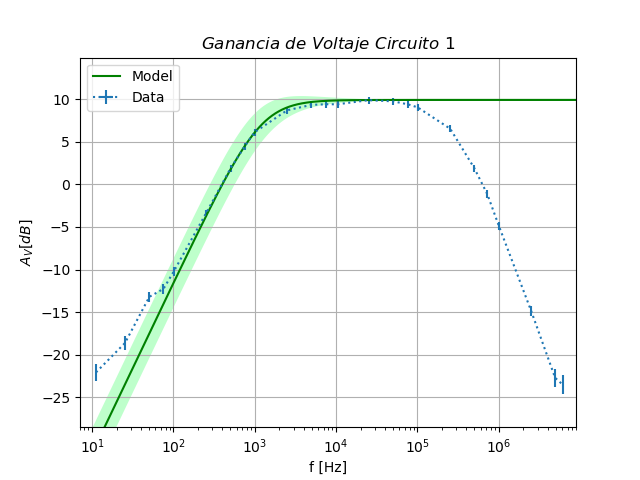

C:\Users\Andres Gomez\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


In [73]:
fit("1.txt",[7439,3.132],[2480,0.037],4,4,1,"Measurement",5)

<IPython.core.display.Javascript object>


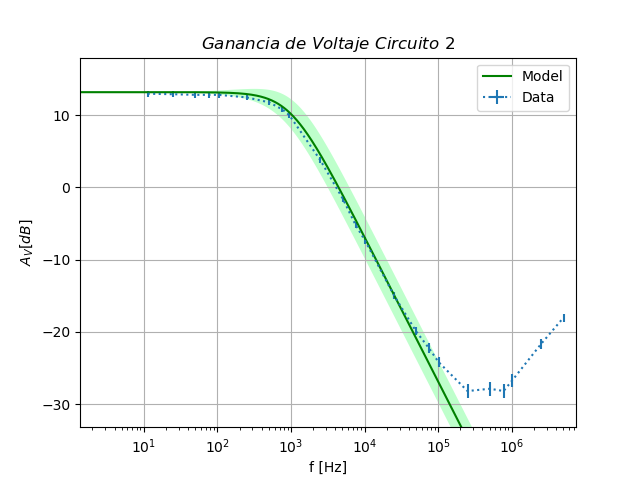

C:\Users\Andres Gomez\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


In [70]:
fit("2.txt",[6270,4.552],[2091,0.062],4,4,1,"Measurement",5)

In [71]:
def fit(file_name, Po, Po_err, ci=2, cf=2, xerr=1, yerr_type="Measurement", yerr=3):
    """
    Fits the function func to the average of the data from ci to cf, 
    with the associated error for each row if err_type is "Measurement";
    if err_type is "Standard deviation", then it calculates the standard
    deviation of the data and uses it as the error.
    Requires a pre-defined func.
    Po: List of the initial guess of the parameters.
    Po_err: List of the respective measurement error of the parameters.
    """
    ydata=avrgc(file_name,ci,cf) #CHECAR SI NO ESTÁ EN MODO FUNCIÓN DE TRANSFERENCIA
    d=data_matrix(file_name,first_line=False,type="float",transpose=True)
    xdata=d[0]
    xerrl=d[xerr]
    if yerr_type=="Standard deviation":
        yerrl=stdc(file_name,ci,cf)
    elif yerr_type=="Measurement":
        yerrl=np.array(d[yerr])/np.sqrt(cf-ci+1)
        yerrl=20*np.sqrt(np.power(yerrl,2)+np.power(ydata*np.array(d[3])/np.array(d[2]),2))/d[2] #FUNCIONES DE TRANSFERENCIA
        #yerrl=yerrl*2*np.pi*np.array(d[0])*10**(-6) #DESFASE DE FUNCIONES DE TRANSFERENCIA
    ydata=20*np.log10(np.array(ydata)/np.array(d[2])) #PARA GRAFICAS DE FUNCIONES DE TRANSFERENCIA
    #ydata=np.array(ydata)*2*np.pi*np.array(d[0])*10**(-6)-np.pi #DESFASE DE FUNCIONES DE TRANSFERENCIA CON FASE PI
    
    dist_plot(file_name,ci,cf,xerr,yerr_type,yerr)
    
    xdataE=[] #Making a list of points in the area of interest of the data for plotting fit and model.
    n=0.001
    m=10 #Parameters for the lenght of the area of interest, n for adding length to the left, m to the right.
    d=0.1 #Parameter for density of points (bigger d, more points) MUST BE FLOAT
    E=(xdata[-1]-xdata[0])/len(xdata)
    left=np.arange(xdata[0]-n*E,xdata[0],1.0/d)
    right=np.arange(xdata[-1],xdata[-1]+m*E,1.0/d)
    xdataE=left.tolist()
    for i in range(0,len(xdata)-1):
        r=np.arange(xdata[i],xdata[i+1],1.0/d)
        xdataE=xdataE+r.tolist()
    xdataE=xdataE+right.tolist()
    
    xdataE=np.array(xdataE)
    
    #NO OLVIDAR QUE HAY BOUNDS
    #popt, pcov = curve_fit(model, xdata, ydata, Po, yerrl,method="dogbox",bounds=([7000,0.1], [10000, 5])) 
    
    #AJUSTE DE UN PARAMETRO
    #plt.plot(xdataE, model(xdataE, *popt), 'r-', label='fit')
    #plt.fill_between(xdataE,model(xdataE, *popt)-err_model(xdataE,0,popt[0],pcov[0][0]),model(xdataE, *popt)+err_model(xdataE,0,popt[0],pcov[0][0]),alpha=0.5,edgecolor='#CC4F1B', facecolor='#FF9848')
    #
    #Comparison to a model with theoretical parameters.
    #plt.plot(xdataE, model(xdataE, *Po), 'g-', label='Model')
    #plt.fill_between(xdataE, model(xdataE,*Po)-err_model(xdataE,0,Po[0],Po_err[0]), model(xdataE, *Po)+err_model(xdataE,0,Po[0],Po_err[0]),alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99',linewidth=0)
    
    ##AJUSTE DE DOS PARAMETROS
    #plt.plot(xdataE, model(xdataE, *popt), 'r-', label='fit')
    #plt.fill_between(xdataE,model(xdataE, *popt)-err_model(xdataE,0,popt[0],pcov[0][0],popt[1],pcov[1][1]),model(xdataE, *popt)+err_model(xdataE,0,popt[0],pcov[0][0],popt[1],pcov[1][1]),alpha=0.5,edgecolor='#CC4F1B', facecolor='#FF9848')
    #
    ##Comparison to a model with theoretical parameters.
    plt.plot(xdataE, model(xdataE, *Po), 'g-', label='Model')
    plt.fill_between(xdataE, model(xdataE,*Po)-err_model(xdataE,0,Po[0],Po_err[0],Po[1],Po_err[1]), model(xdataE, *Po)+err_model(xdataE,0,Po[0],Po_err[0],Po[1],Po_err[1]),alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99',linewidth=0)
    
    #AJUSTE DE TRES PARAMETROS
    #plt.plot(xdataE, model(xdataE, *popt), 'r-', label='fit')
    #plt.fill_between(xdataE,model(xdataE, *popt)-err_model(xdataE,0,popt[0],pcov[0][0],popt[1],pcov[1][1],popt[2],pcov[2][2]),model(xdataE, *popt)+err_model(xdataE,0,popt[0],pcov[0][0],popt[1],pcov[1][1],popt[2],pcov[2][2]),alpha=0.5,edgecolor='#CC4F1B', facecolor='#FF9848')
    
    #Comparison to a model with theoretical parameters.
    #plt.plot(xdataE, model(xdataE, *Po), 'g-', label='Model')
    #plt.fill_between(xdataE, model(xdataE,*Po)-err_model(xdataE,0,Po[0],Po_err[0],Po[1],Po_err[1],Po[2],Po_err[2]), model(xdataE, *Po)+err_model(xdataE,0,Po[0],Po_err[0],Po[1],Po_err[1],Po[2],Po_err[2]),alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99',linewidth=0)
    
    #print(popt)
    #print(np.sqrt(np.diag(pcov)))
    
    plt.xscale("log")
    plt.yscale("linear")
    plt.xlim(xdataE.min()-E,xdataE.max()+E)
    plt.ylim(np.array(ydata).min()-5,np.array(ydata).max()+5)
    plt.locator_params(numticks=10)
    plt.xlabel("f [Hz]")
    plt.ylabel(r'$A_{V} [dB]$')
    plt.legend()
    plt.title(r'$Ganancia\ de\ Voltaje\ Circuito\ 1$')
    plt.show()

In [7]:
def P_file(file_name):
    """
    Escribe en file_name todos los parámetros esperados.
    """
    Rl=["R[cm]",14.1,14.2,14.5,11.2,11.3,11.3,11.2,11.4,10.5,10.1,10.5]
    
    dRl=["dR[cm]",0.7,0.7,0.7,0.7,0.7,0.7,0.8,0.8,0.7,0.7,0.7]
    
    wl=["w_crit[r/s]"]
    dwl=["dw_crit[r/s]"]
    
    for i in range(1,len(Rl)):
        wl.append(m.sqrt(978/Rl[i]))
        dwl.append(m.sqrt(9**2/(4*978*Rl[i])+978*dRl[i]**2/(4*Rl[i]**3)))
    
    D=[]
    D.append([Rl[0],dRl[0],wl[0],dwl[0]])
    for k in range(1,len(Rl)):
        row=[]
        row=[str(Rl[k]),str(dRl[k]),str(round(wl[k],3)),str(round(dwl[k],3))]
        D.append(row)
    
    outfile=open(file_name,"w")
    for i in D:
        j=i[0]
        outfile.write(j)
        for j in i[1:]:
            outfile.write("\t" + j)
        outfile.write('\n')
    outfile.close()


xo=21
yo=0
x1=57
y1=20.6

def line_fit_dispersion(file_name, n):
    """
    Returns the weighted sum of squares of a line fit with respect to the data (from the first one till the nth one) 
    in file_name(string).
    S=sum((y(xi)-yi)/dyi)**2
    where y(xi) is the expected value at x=xi and yi is the measured value +-dyi
    """
    D=data_matrix(file_name,False,"float")
    
    xo=D[0][0]
    yo=D[0][1]
    xn=D[n-1][0]
    yn=D[n-1][1]
    M=(yn-yo)/(xn-xo)
    def y(x):
        return M*x+(yo-M*xo)
    S=0
    t=0
    for r in D:
        t+=1
        S+=((y(r[0])-r[1])/r[3])**2
        if t==n:
            break
    return S
    
def sum_rel_err(file_name, n):
    """
    Returns the sum of relative errors der=((yi+1-yi)/dyi)**2 of subsecuent data of a dataset until the nth data.
    The dataset in the second column (element 1 of a list) and error of the dataset on the 4th column (element 3 of a list)
    """
    D=data_matrix(file_name,False,"float")
    der=0
    for t in range(0,n-1): 
        der+=((D[t+1][1]-D[t][1])/D[t][3])**2
    return der
    
    
def best_data_lft(file_name):
    """
    Returns n>=2 such that a data set frpm i=1 to n is optimal, ie
    a=S/(der*(n-1)**2) is minimal.
    """
    D=data_matrix(file_name,False,"float")
    a=0
    amin=0
    nmin=3
    for n in range(3,len(D)+1):
        S=line_fit_dispersion(file_name, n)
        der=sum_rel_err(file_name, n) 
        a=S/((n-1)**2*der)
        if n==3:
            amin=a
        elif a<amin:
            amin=a
            nmin=n
    return [nmin,amin]
    
def plotsoliton(k,h):
    L=np.sqrt(4*h**3/(3*k))
    x=np.arange(-20*k,20*k,0.1)
    u=np.cosh(x/L)
    plt.plot(x,k*np.power(u,-2))
    plt.xlim(-15*k,15*k)
    plt.ylim(-15*k,15*k)

In [8]:
def serie(R,dR):
    "Calcula la resistencia equivalente en serie de una lista R y su propagación de error a partir de sus errores dR"
    Req=0
    dReq=0
    for i in range(0,len(R)):
        Req+=R[i]
        dReq+=dR[i]**2
    print(Req)
    print(np.sqrt(dReq))

In [9]:
def paralelo(R,dR):
    "Calcula la resistencia equivalente en paralelo de una lista R y su propagación de error a partir de sus errores dR"
    Req=0
    dReq=0
    for i in range(0,len(R)):
        Req+=1/R[i]
    Req=1/Req
    for i in range(0,len(R)):
        dReq+=dR[i]**2/(R[i]**4)
    dReq=Req**2*np.sqrt(dReq)
    print(Req)
    print(dReq)

In [65]:
serie([66.829E3,26.835E3],[545,225])

93664.0
589.6185207403173


In [66]:
paralelo([93664,11.859E3],[589,105])

10526.249026278632
83.05949994902757


In [67]:
serie([11.859E3,26.835E3],[105,225])

38694.0
248.29418035870273


In [68]:
paralelo([38694,66.829E3],[248,545])

24505.381063843903
123.54805436363871


In [69]:
serie([66.829E3, 11.859E3,26.835E3],[545, 105,225])

105523.0
598.8948154726337


In [70]:
serie([10526/294,557],[83/294,14])

592.8027210884354
14.002846160253211


In [73]:
serie([3868,557],[41,14])

4425
43.32435804486894


In [76]:
paralelo([3868,5574],[41,54])

2283.439101885194
16.92009393260653


In [79]:
paralelo([1E3,557],[0,14])

357.7392421323057
5.77498433535499


In [10]:
def Ohm(R,dR,I,dI): #I en mA!!!!!
    I=np.array(I)
    R=np.array(R)
    dI=np.array(dI)
    dR=np.array(dR)
    I=I*10**-3
    dI=dI*10**-3
    V=R*I
    dV=np.sqrt(np.power(I*dR,2)+np.power(R*dI,2))
    print(V)
    print(dV)

In [71]:
Ohm(557,14,1.7,5E-2)

0.9469
0.03663417120667533


In [72]:
Ohm(24505,123,1.7,5E-2)

41.6585
1.2429643488451307


In [74]:
Ohm(4425,43,1.7,5E-2)

7.5225
0.2330132453316764


In [12]:
A=data_matrix("2.txt",first_line=False,type="float")
dV=["dV_i[mV]"]
for i in range(0,len(A)):
    dV1=round(A[i][4]*0.03+1,4)
    dV.append(str(dV1))
print(dV)

['dV_i[mV]', '43.6', '45.4', '46.0', '46.0', '46.0', '44.2', '40.0', '35.8', '32.8', '16.6', '9.4', '6.52', '5.32', '2.8', '2.02', '1.78', '1.624', '1.384', '1.408', '1.384', '1.456', '1.792', '2.176']


In [13]:
writel("2.txt",dV,5)

In [ ]:
write("lrc.txt","0.5","df")